# DCGAN - Deep Convolutional GANs

# Importação das bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.0.0'

# Carregamento e pré-processamento da base de dados

In [2]:
(X_treinamento, y_treinamento), (_, _) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
X_treinamento.shape

(60000, 28, 28)

In [4]:
28 * 28

784

In [5]:
y_treinamento.shape

(60000,)

3


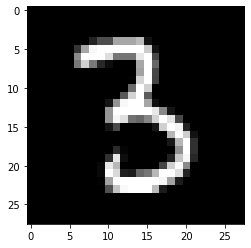

In [6]:
i = np.random.randint(0, 60000)
#print(i)
print(y_treinamento[i])
plt.imshow(X_treinamento[i], cmap = 'gray');

In [7]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1).astype('float32')

In [8]:
X_treinamento.shape

(60000, 28, 28, 1)

In [9]:
X_treinamento[0].min(), X_treinamento[0].max()

(0.0, 255.0)

In [10]:
X_treinamento = (X_treinamento - 127.5) / 127.5

In [11]:
X_treinamento[0].min(), X_treinamento[0].max()

(-1.0, 1.0)

In [12]:
buffer_size = 60000
batch_size = 256

In [13]:
buffer_size / batch_size

234.375

In [14]:
type(X_treinamento)

numpy.ndarray

In [15]:
X_treinamento = tf.data.Dataset.from_tensor_slices(X_treinamento).shuffle(buffer_size).batch(batch_size)

In [16]:
type(X_treinamento)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [17]:
X_treinamento

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

# Construção do gerador

- Batch normalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
- Leaky Relu: https://keras.io/api/layers/activation_layers/leaky_relu/
- Funções de ativação: https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e
- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [18]:
7*7*256

12544

In [19]:
def cria_gerador():
  network = tf.keras.Sequential()

  network.add(layers.Dense(units = 7*7*256, use_bias = False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding='same', use_bias=False, strides=(2,2)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(filters = 1, kernel_size=(5,5), padding='same',use_bias=False, strides=(2,2), activation = 'tanh'))

  network.summary()

  return network

In [20]:
gerador = cria_gerador()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

In [21]:
# 100 -> 12544
gerador.input

<tf.Tensor 'dense_input:0' shape=(None, 100) dtype=float32>

In [22]:
ruido = tf.random.normal([1, 100])
ruido

<tf.Tensor: id=470, shape=(1, 100), dtype=float32, numpy=
array([[-1.2970735e+00,  3.4377527e-01, -4.0619445e-01,  2.8704844e-02,
        -1.1932873e+00, -1.0385554e-01, -9.2631519e-01,  2.5823709e-02,
         3.5353112e-01,  1.1277669e-03,  1.7001690e-01,  9.2999965e-01,
         7.4526137e-01,  1.8317996e+00,  7.8305614e-01,  1.0435941e+00,
        -7.4424930e-02, -6.8303639e-01,  7.1680401e-03, -5.8289981e-01,
         5.1480558e-02,  1.0006784e+00, -1.6343840e+00, -7.3558813e-01,
         1.0279442e+00, -1.3337198e+00,  3.5808036e-01,  1.5455278e+00,
         9.0330863e-01,  1.3296510e+00,  3.6432785e-01,  9.6961319e-01,
         2.3599949e+00, -1.3331496e+00, -7.5707918e-01, -2.8595731e-01,
        -4.0047997e-01,  1.0358057e+00,  3.6856666e-01, -1.9673151e+00,
        -1.3628789e+00, -3.6695480e-01,  3.5391772e-01,  2.4316196e-01,
         1.1551430e+00, -1.3535832e+00,  7.9301441e-01,  6.8120164e-01,
        -4.6739411e-02,  1.0898008e+00,  1.0118400e+00,  1.0181501e+00,
      

In [23]:
imagem_gerada = gerador(ruido, training = False)

In [25]:
imagem_gerada.shape

TensorShape([1, 28, 28, 1])

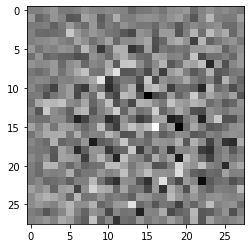

In [26]:
plt.imshow(imagem_gerada[0, :, :, 0], cmap='gray');

# Construção do discriminador

- Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
- Conv2d x Conv2dTranspose: https://stackoverflow.com/questions/68976745/in-keras-what-is-the-difference-between-conv2dtranspose-and-conv2d

In [27]:
def cria_discriminador():
  network = tf.keras.Sequential()

  # 14x14x64
  network.add(layers.Conv2D(filters = 64, strides=(2,2), kernel_size = (5,5), padding = 'same', input_shape = [28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(filters = 128, strides=(2,2), kernel_size = (5,5), padding = 'same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network

In [28]:
7 * 7 * 128

6272

In [29]:
discriminador = cria_discriminador()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [30]:
discriminador.input

<tf.Tensor 'conv2d_input:0' shape=(None, 28, 28, 1) dtype=float32>

In [31]:
discriminador(imagem_gerada, training = False) # logits

<tf.Tensor: id=779, shape=(1, 1), dtype=float32, numpy=array([[0.00206065]], dtype=float32)>

In [32]:
tf.sigmoid(0.00356018)

<tf.Tensor: id=781, shape=(), dtype=float32, numpy=0.5008901>

# Cálculo do erro

- Logits: https://deepai.org/machine-learning-glossary-and-terms/logit

Este método quantifica quão bem o discriminador é capaz de distinguir imagens reais de falsificações. Ele compara as previsões do discriminador em imagens reais com uma matriz de 1s e as previsões do discriminador em imagens falsas (geradas) com uma matriz de 0s.

In [33]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [34]:
tf.ones_like(1)

<tf.Tensor: id=785, shape=(), dtype=int32, numpy=1>

In [35]:
tf.zeros_like(1)

<tf.Tensor: id=787, shape=(), dtype=int32, numpy=0>

In [36]:
def discriminador_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [37]:
def gerador_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [38]:
gerador_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminador_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

# Treinamento da GAN e visualização dos resultados

- Adaptado de: https://www.tensorflow.org/beta/tutorials/generative/dcgan
- @tf.function: https://www.tensorflow.org/guide/function#:~:text=You%20can%20use%20tf.,is%20required%20to%20use%20SavedModel%20.

In [39]:
X_treinamento

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

In [40]:
epocas = 100
dimensao_ruido = 100
numero_imagens = 16

In [41]:
batch_size, dimensao_ruido

(256, 100)

In [42]:
@tf.function
def treinamento(imagens):
  ruido = tf.random.normal([batch_size, dimensao_ruido])
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    imagens_geradas = gerador(ruido, training = True)

    expected_output = discriminador(imagens, training = True)
    fake_output = discriminador(imagens_geradas, training = True)

    gen_loss = gerador_loss(fake_output)
    disc_loss = discriminador_loss(expected_output, fake_output)

  gradientes_gerador = gen_tape.gradient(gen_loss, gerador.trainable_variables)
  gradientes_discriminador = disc_tape.gradient(disc_loss, discriminador.trainable_variables)

  gerador_optimizer.apply_gradients(zip(gradientes_gerador, gerador.trainable_variables))
  discriminador_optimizer.apply_gradients(zip(gradientes_discriminador, discriminador.trainable_variables))

In [43]:
imagens_teste = tf.random.normal([numero_imagens, dimensao_ruido])
imagens_teste.shape

TensorShape([16, 100])

In [44]:
60000 / 256

234.375

In [45]:
def treina_gan(dataset, epocas, imagens_teste):
  for epoca in range(epocas):
    for imagem_batch in dataset:
      #print(imagem_batch.shape)
      treinamento(imagem_batch)

    print('Época: ', epoca + 1)
    imagens_geradas = gerador(imagens_teste, training=False)
    fig = plt.figure(figsize = (10,10))
    for i in range(imagens_geradas.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(imagens_geradas[i, :, :, 0] * 127.5 + 127.5, cmap = 'gray')
      plt.axis('off')
    plt.show()

Época:  1


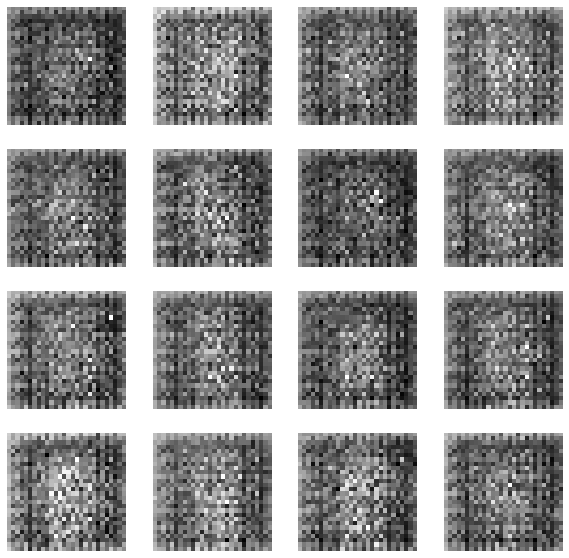

Época:  2


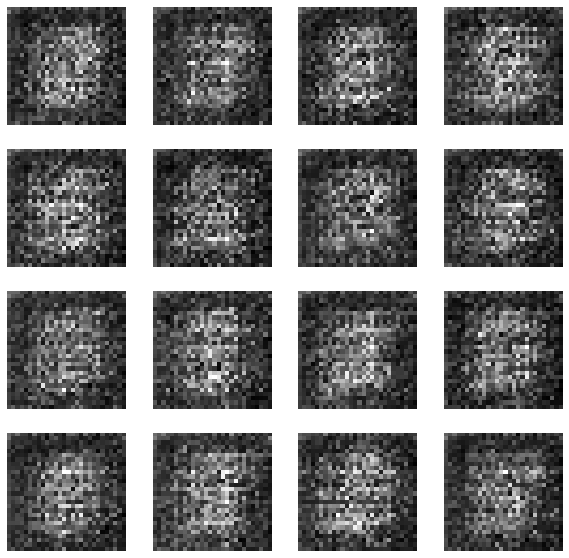

Época:  3


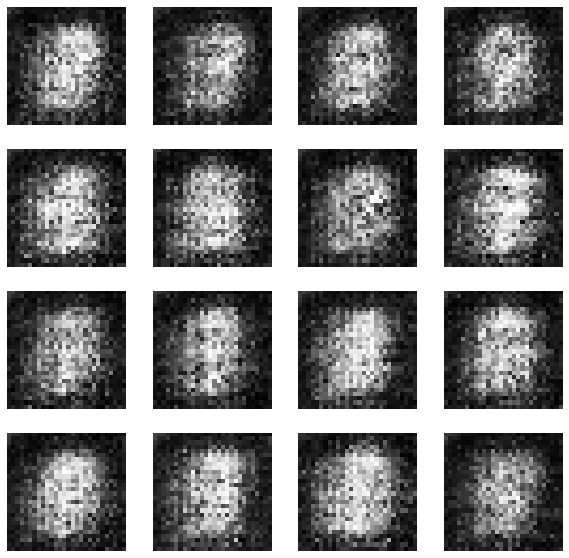

Época:  4


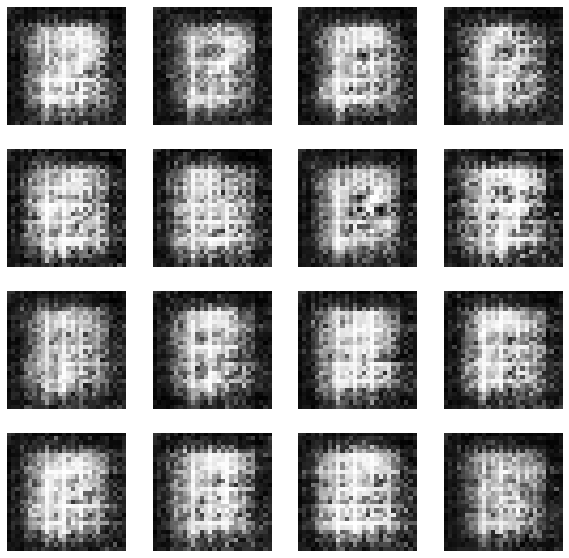

Época:  5


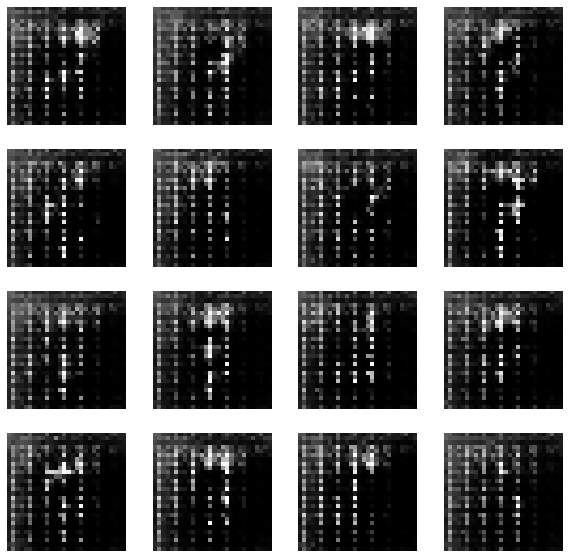

Época:  6


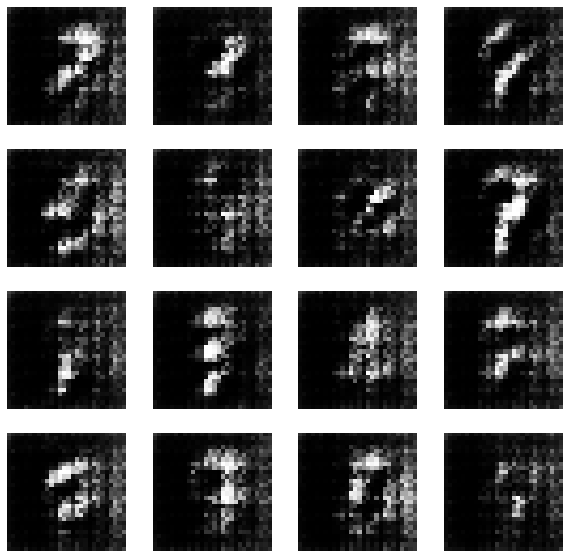

Época:  7


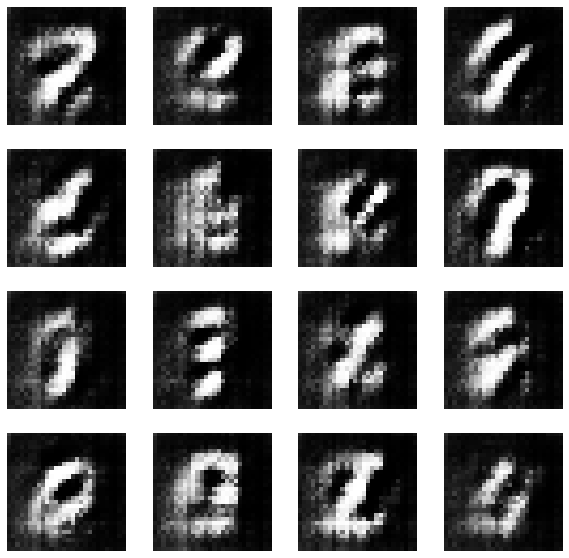

Época:  8


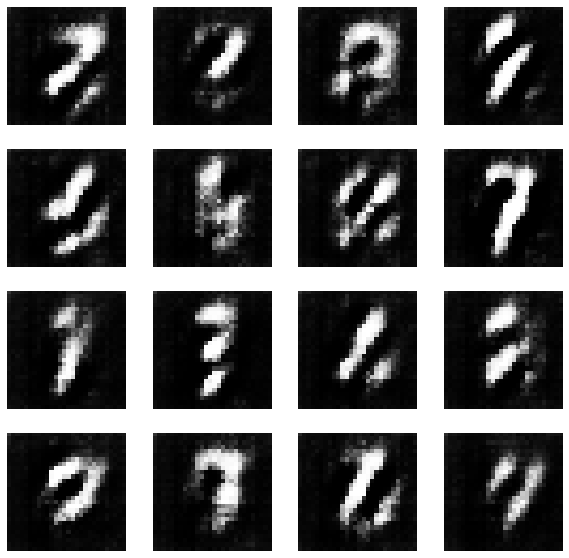

Época:  9


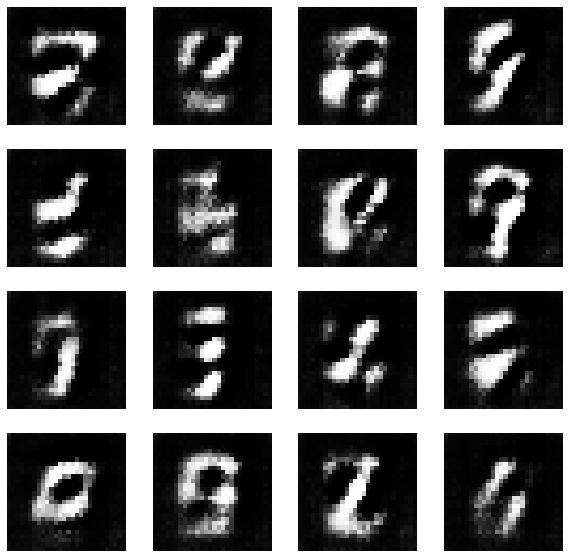

Época:  10


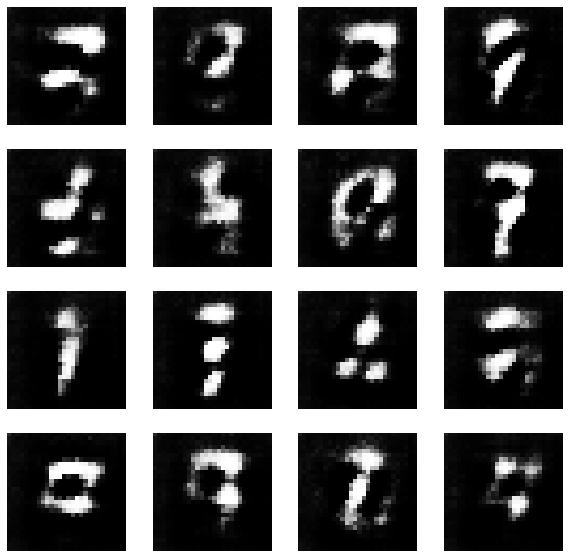

Época:  11


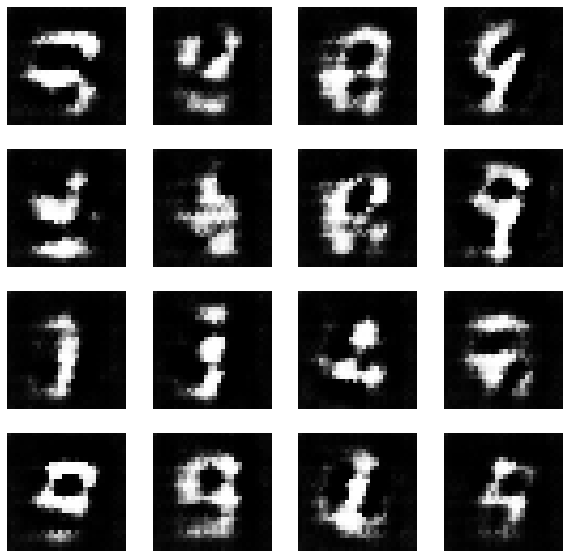

Época:  12


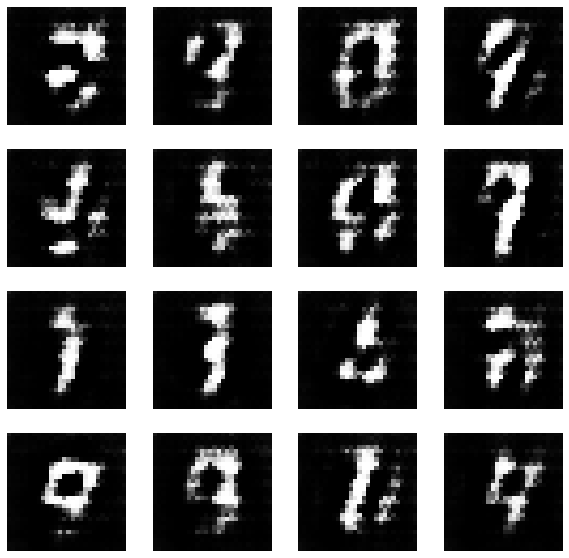

Época:  13


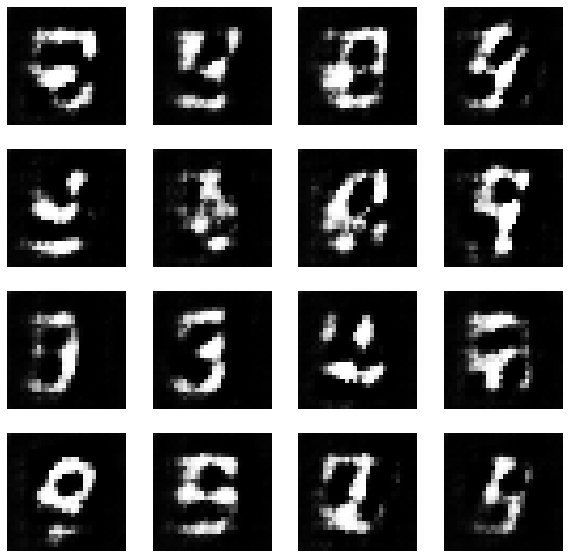

Época:  14


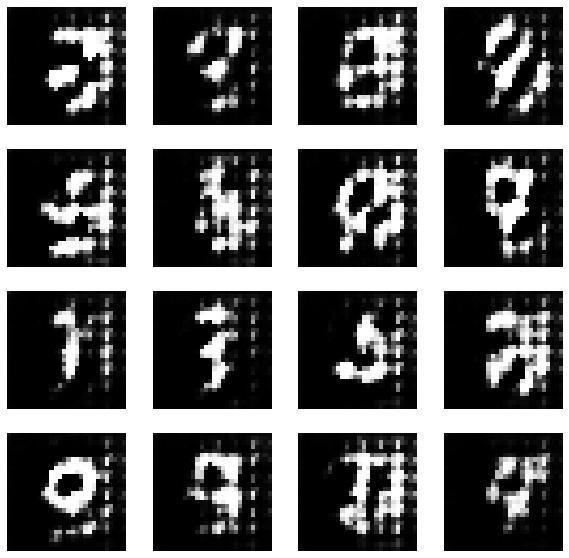

Época:  15


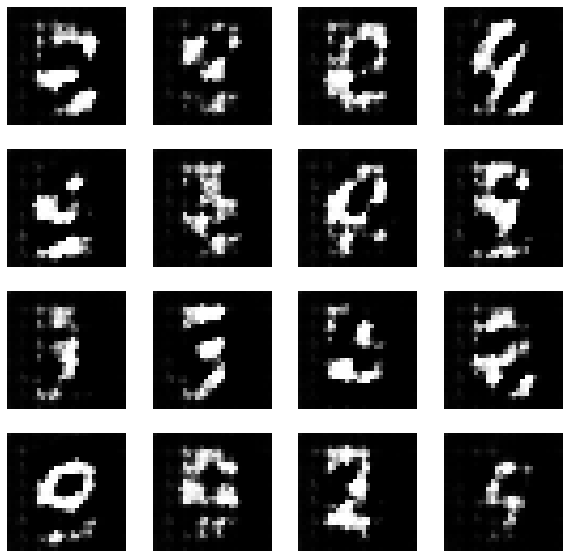

Época:  16


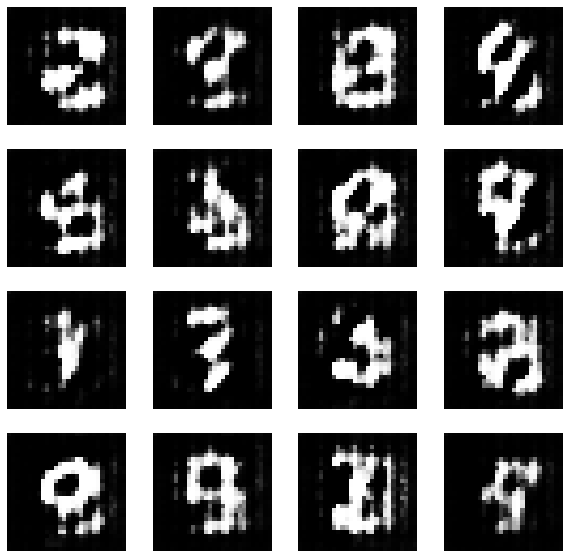

Época:  17


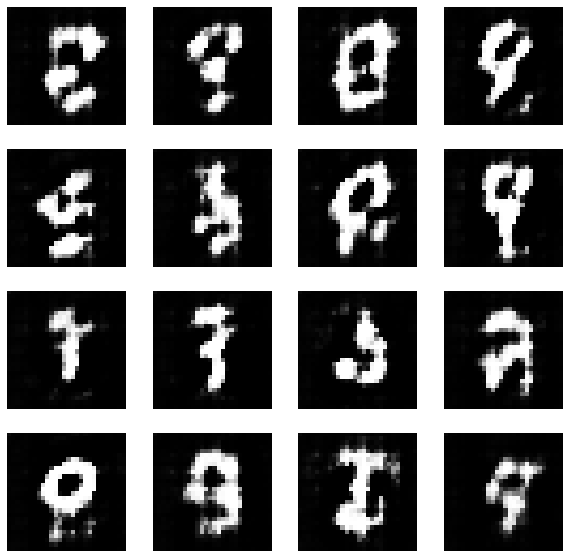

Época:  18


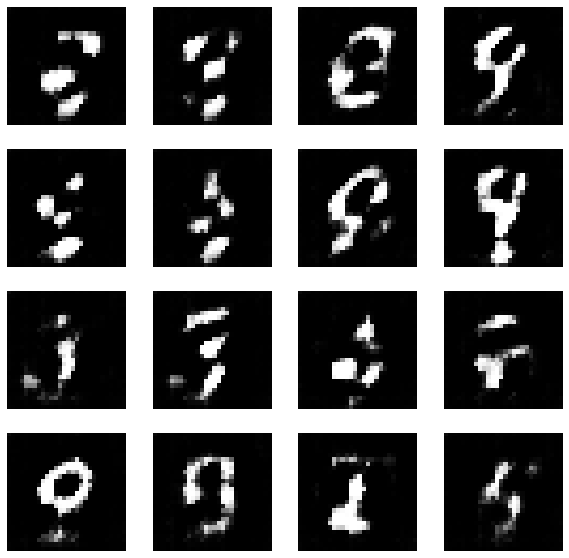

Época:  19


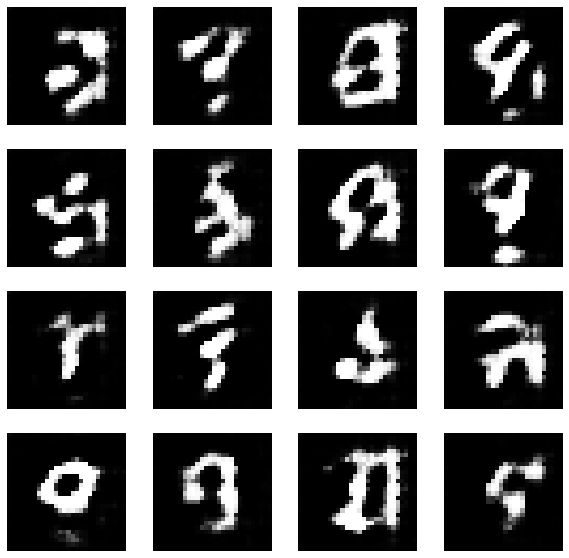

Época:  20


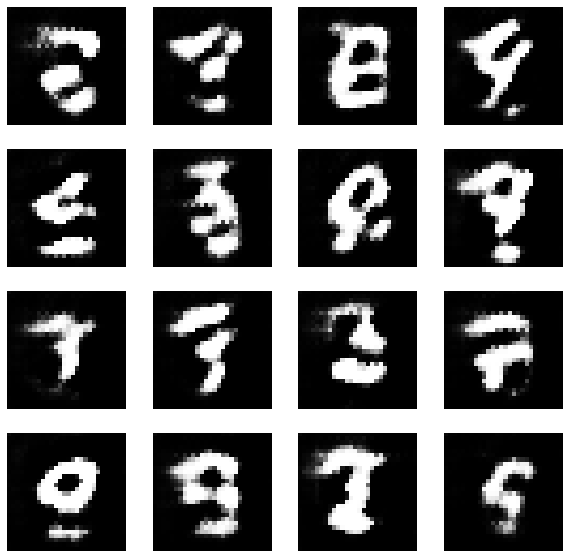

Época:  21


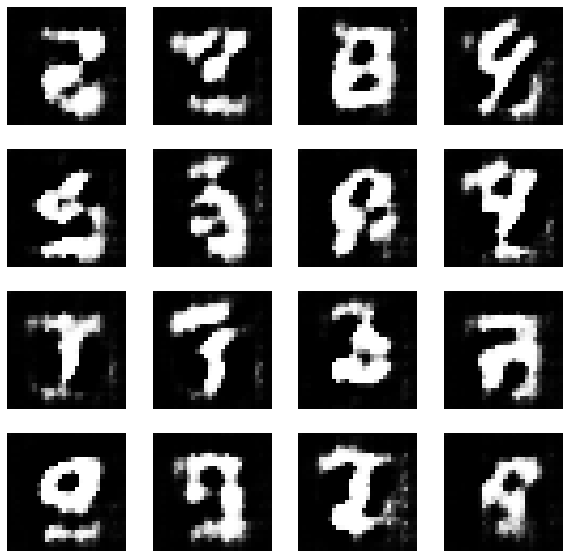

Época:  22


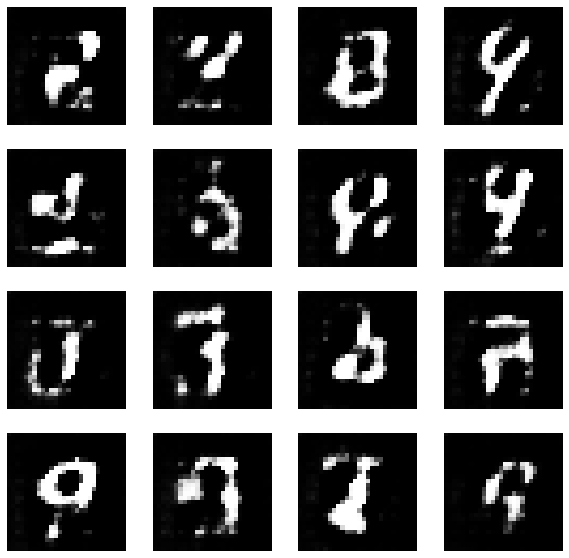

Época:  23


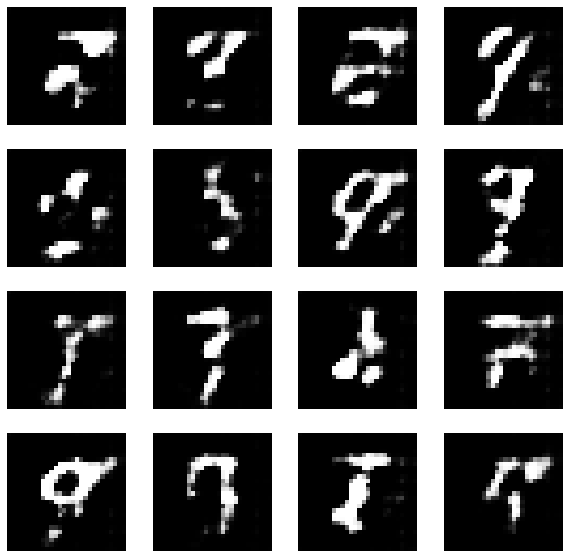

Época:  24


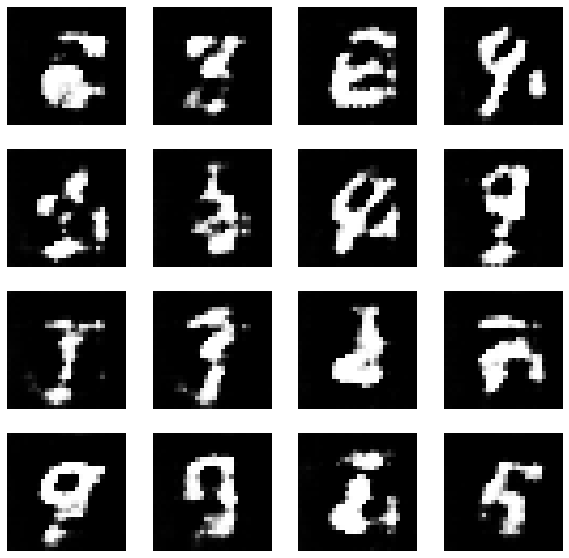

Época:  25


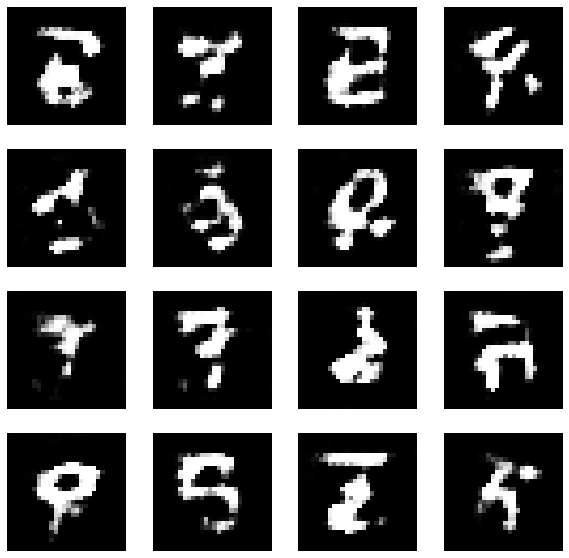

Época:  26


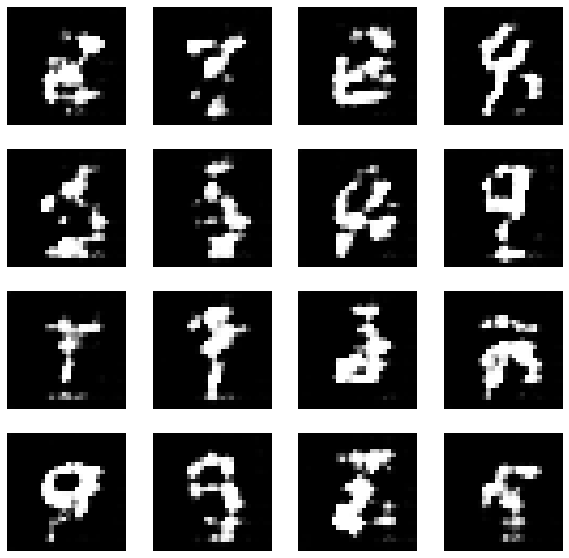

Época:  27


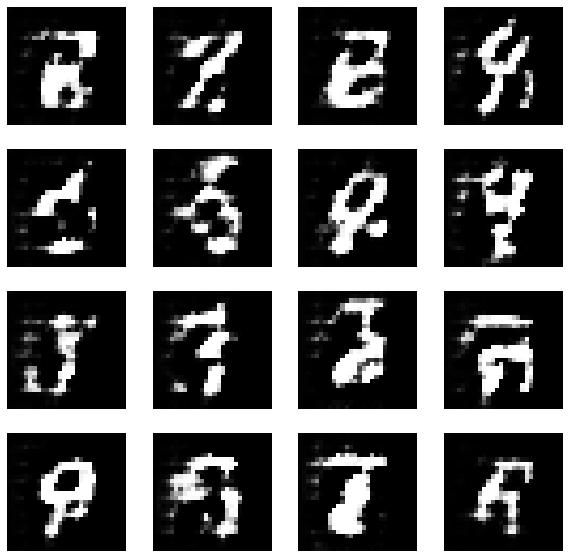

Época:  28


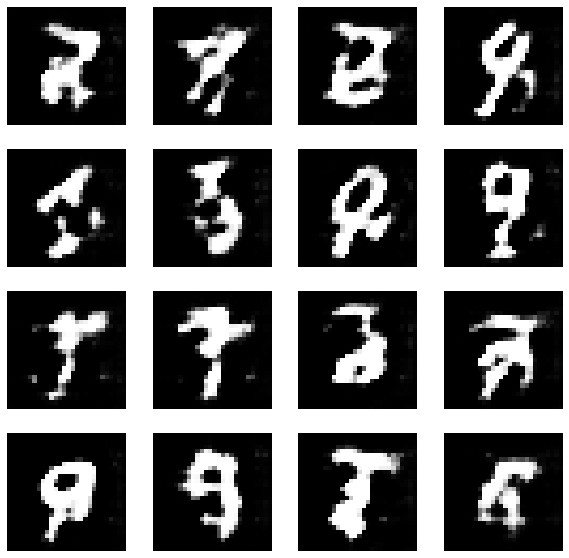

Época:  29


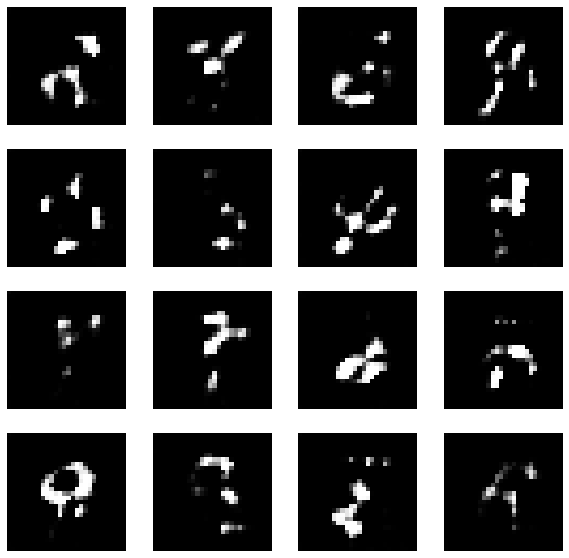

Época:  30


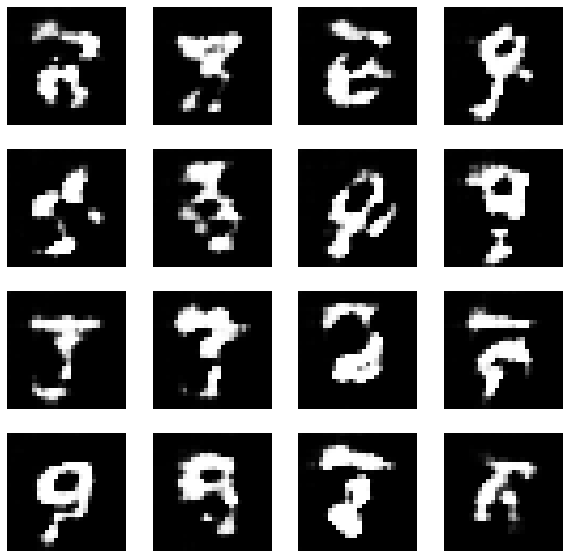

Época:  31


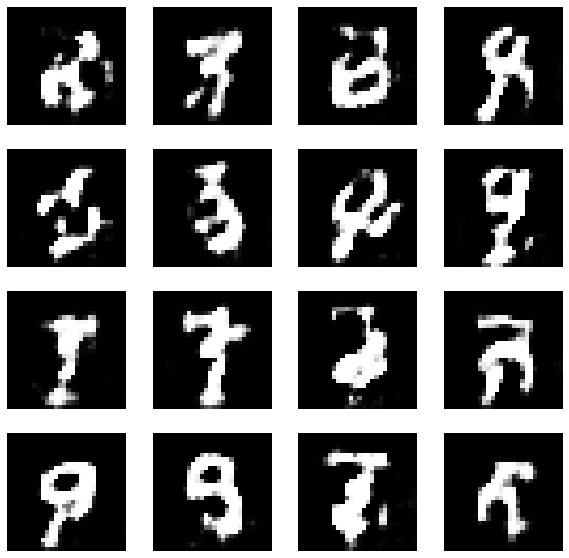

Época:  32


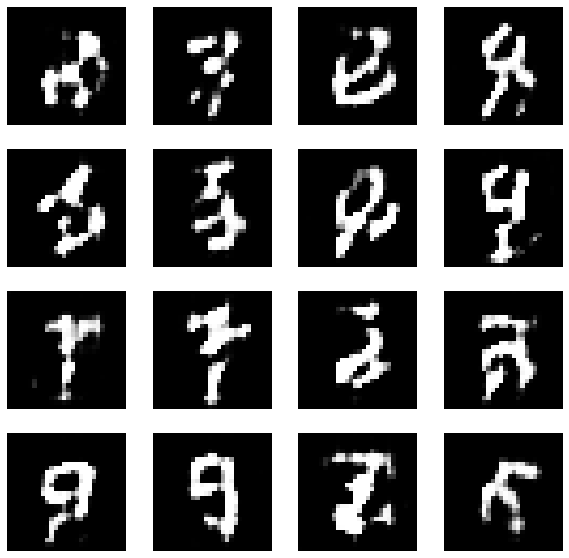

Época:  33


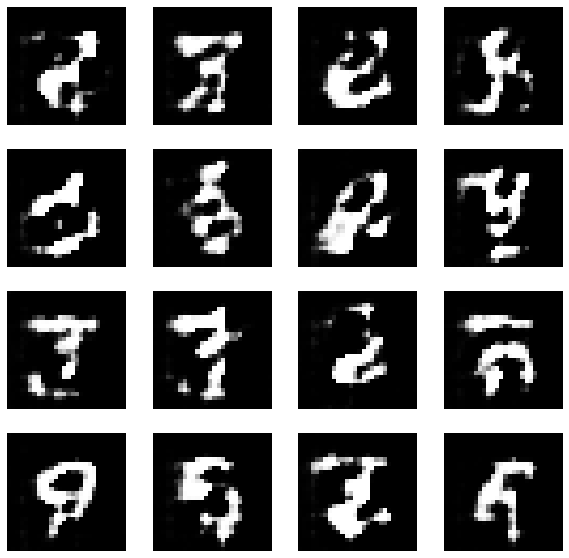

Época:  34


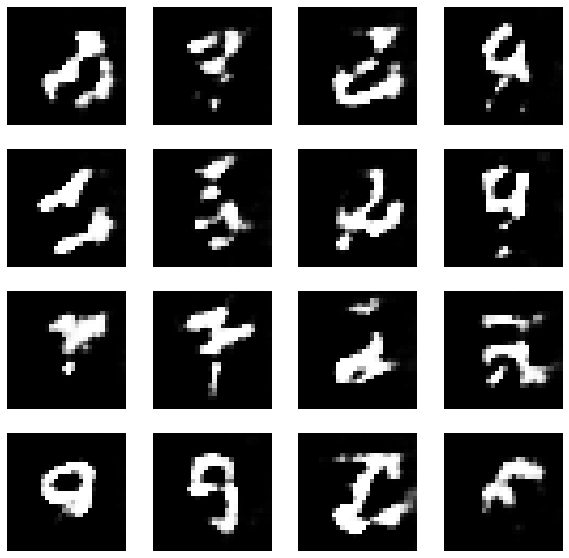

In [46]:
treina_gan(X_treinamento, epocas, imagens_teste)